In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set seaborn style
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('Cleaned-amazon-Dataset.csv')

In [6]:
top_categories = df['category'].value_counts().nlargest(10).index

In [10]:
df_top10 = df[df['category'].isin(top_categories)]

## Barplot: Product Count by Category (Top 10 )

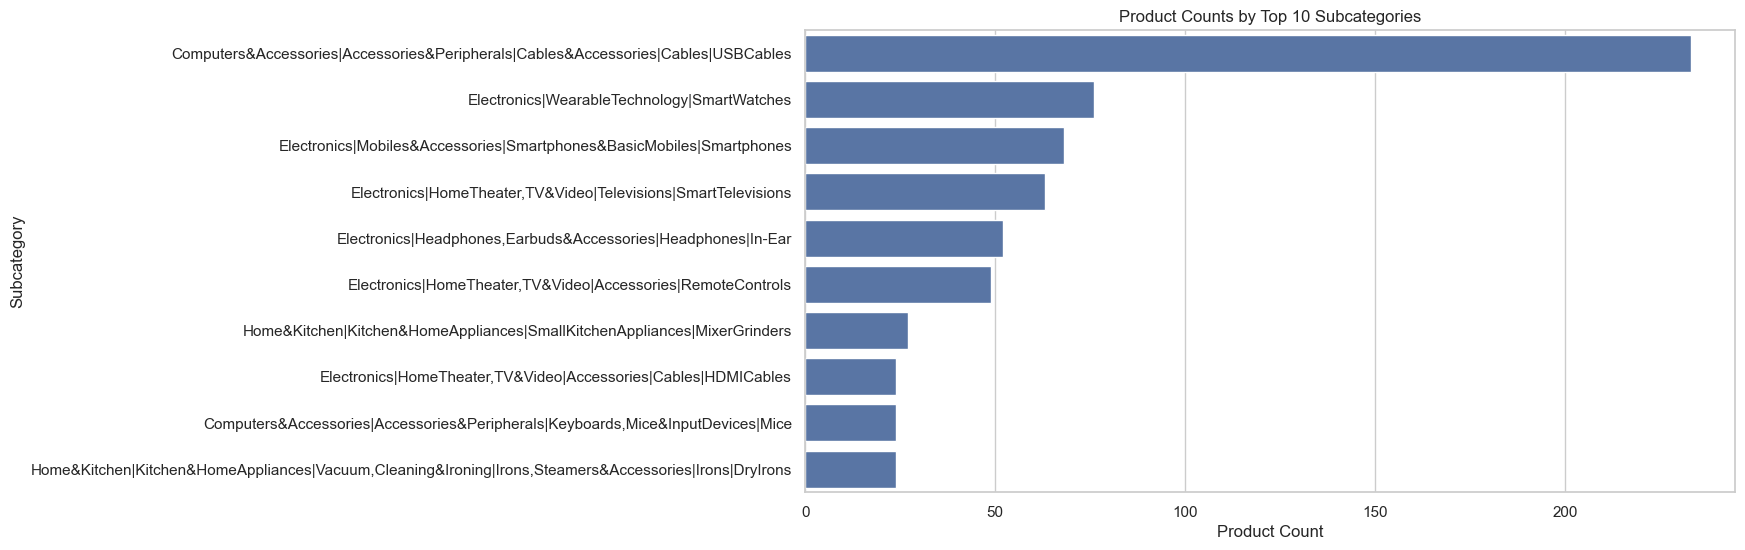

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(y='category', data=df_top10, order=df_top10['category'].value_counts().index)
plt.title('Product Counts by Top 10 Subcategories')
plt.xlabel('Product Count')
plt.ylabel('Subcategory')
plt.show()

## Pie Chart: Product Category Proportions

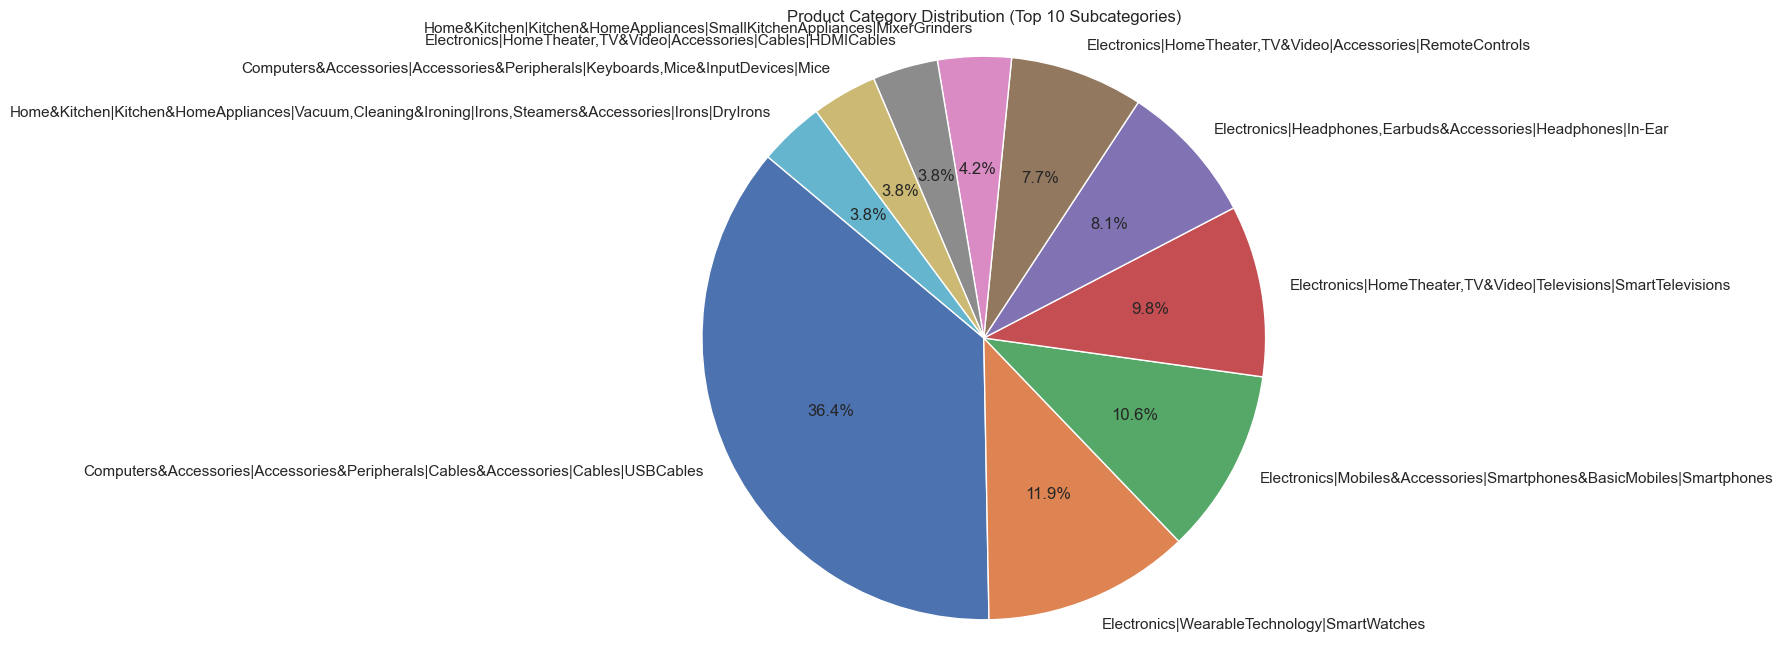

In [12]:
category_counts = df_top10['category'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Category Distribution (Top 10 Subcategories)')
plt.axis('equal')
plt.show()

## Boxplot of Discounted Price by Subcategory

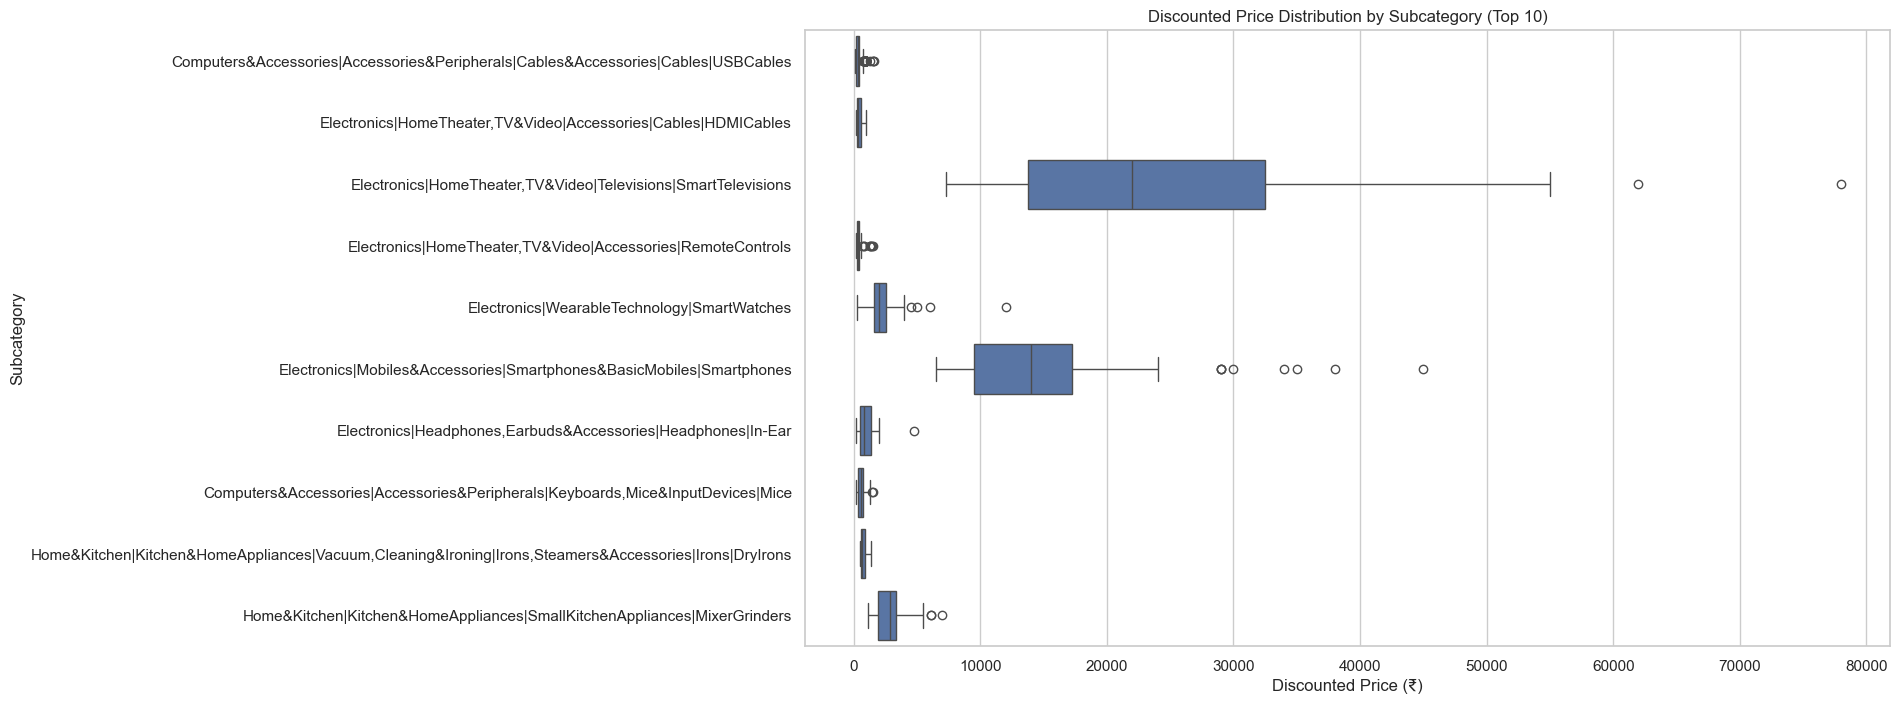

In [18]:
plt.figure(figsize=(14,8))
sns.boxplot(x='discounted_price', y='category', data=df_top10)
plt.title('Discounted Price Distribution by Subcategory (Top 10)')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Subcategory')
plt.show()

## Top 10 Products by Rating Count

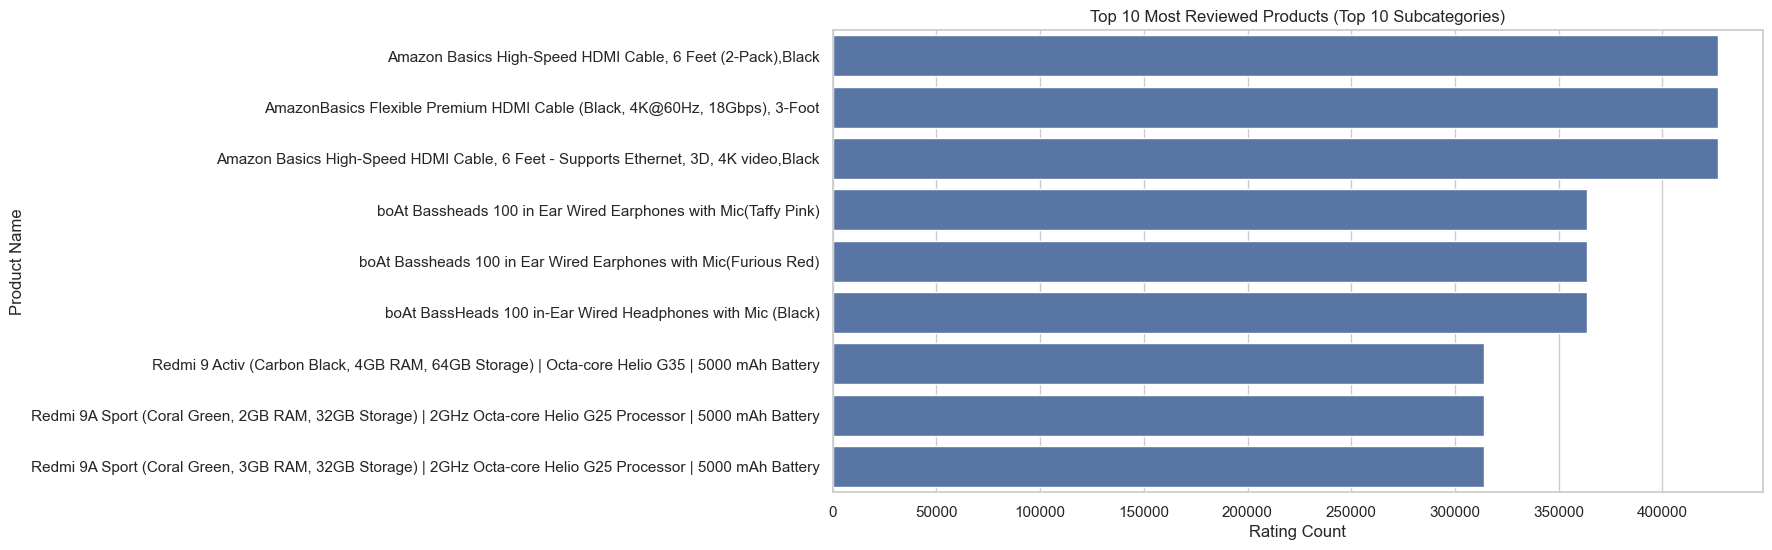

In [16]:
top_reviews = df_top10.sort_values('rating_count', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y='product_name', x='rating_count', data=top_reviews)
plt.title('Top 10 Most Reviewed Products (Top 10 Subcategories)')
plt.xlabel('Rating Count')
plt.ylabel('Product Name')
plt.show()

## WordCloud of Product Names

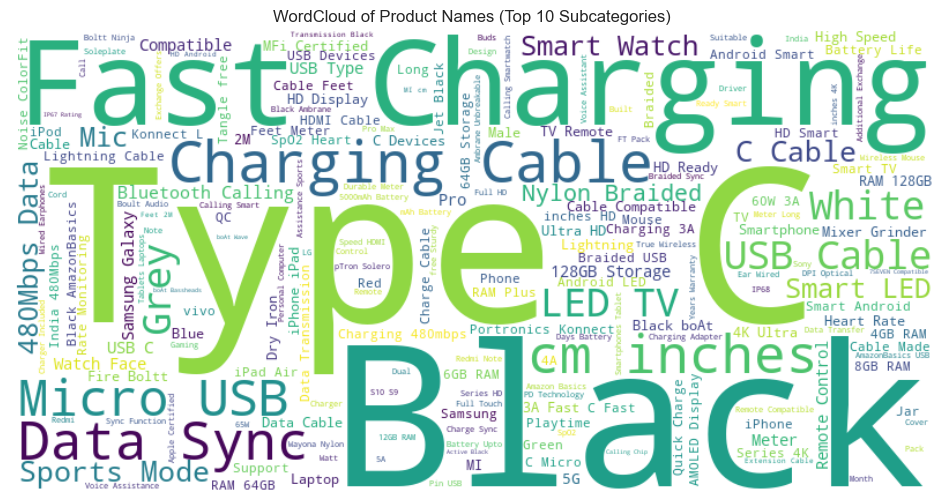

In [17]:
text = " ".join(df_top10['product_name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Product Names (Top 10 Subcategories)')
plt.show()

## Violin Plot - Distribution of Discounted Prices by Subcategory

C:\Users\bedab\AppData\Local\Temp\ipykernel_9040\1469492210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='discounted_price', y='category', data=df_top10, inner='box', palette='pastel')


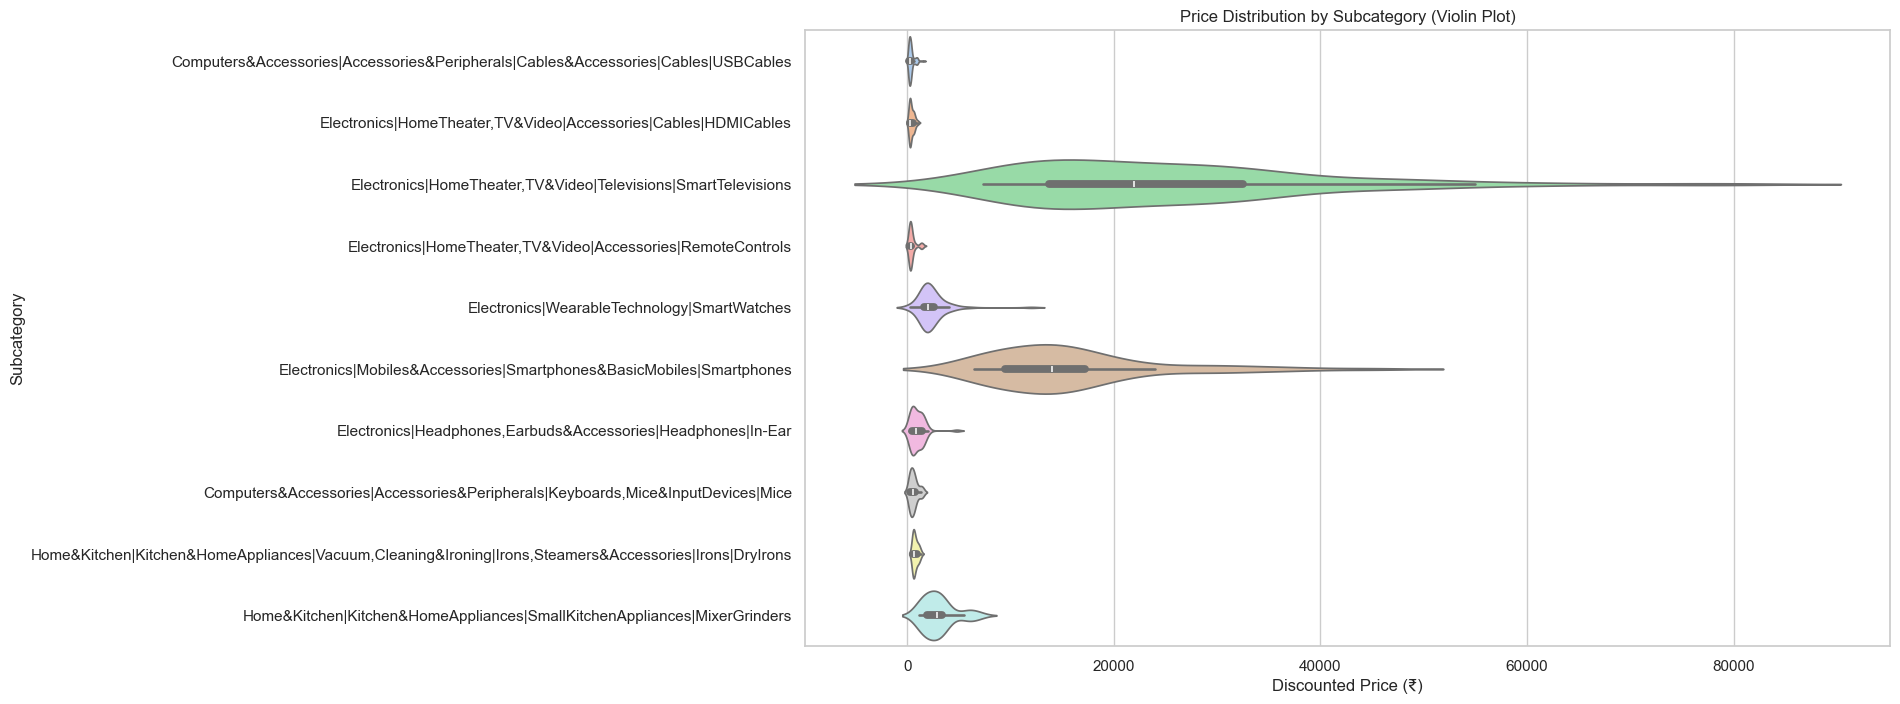

In [19]:
plt.figure(figsize=(14,8))
sns.violinplot(x='discounted_price', y='category', data=df_top10, inner='box', palette='pastel')
plt.title('Price Distribution by Subcategory (Violin Plot)')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Subcategory')
plt.show()

##  Scatter Plot — Relationship Between Rating Count and Discounted Price

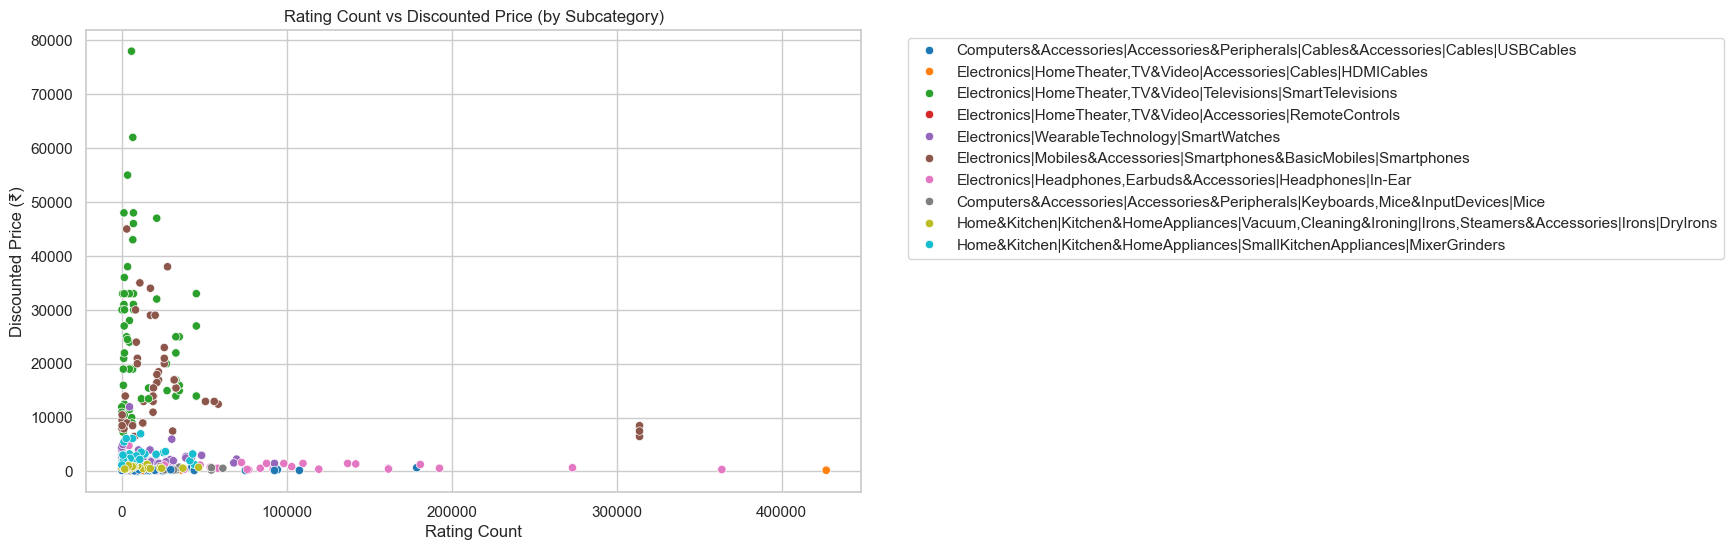

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_top10, x='rating_count', y='discounted_price', hue='category', palette='tab10')
plt.title('Rating Count vs Discounted Price (by Subcategory)')
plt.xlabel('Rating Count')
plt.ylabel('Discounted Price (₹)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##  Heatmap of Average Ratings per Subcategory

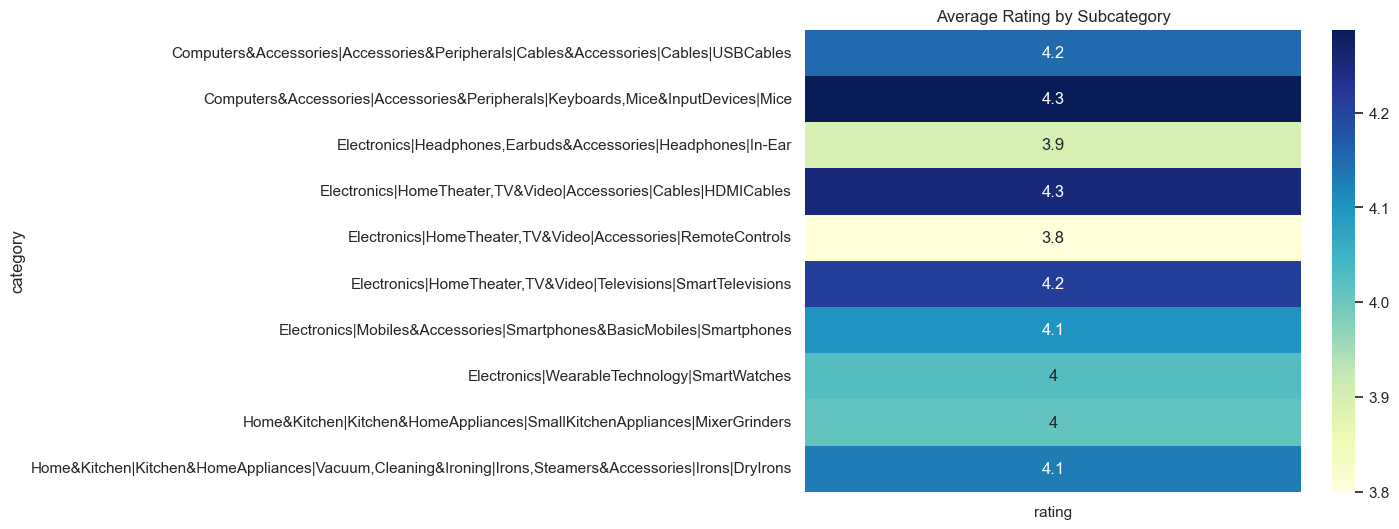

In [21]:
avg_rating = df_top10.groupby('category')['rating'].mean().reset_index().sort_values('rating', ascending=False)

plt.figure(figsize=(8,6))
sns.heatmap(avg_rating.pivot_table(values='rating', index='category'), annot=True, cmap='YlGnBu')
plt.title('Average Rating by Subcategory')
plt.show()

## Pairplot (Scatter Matrix)

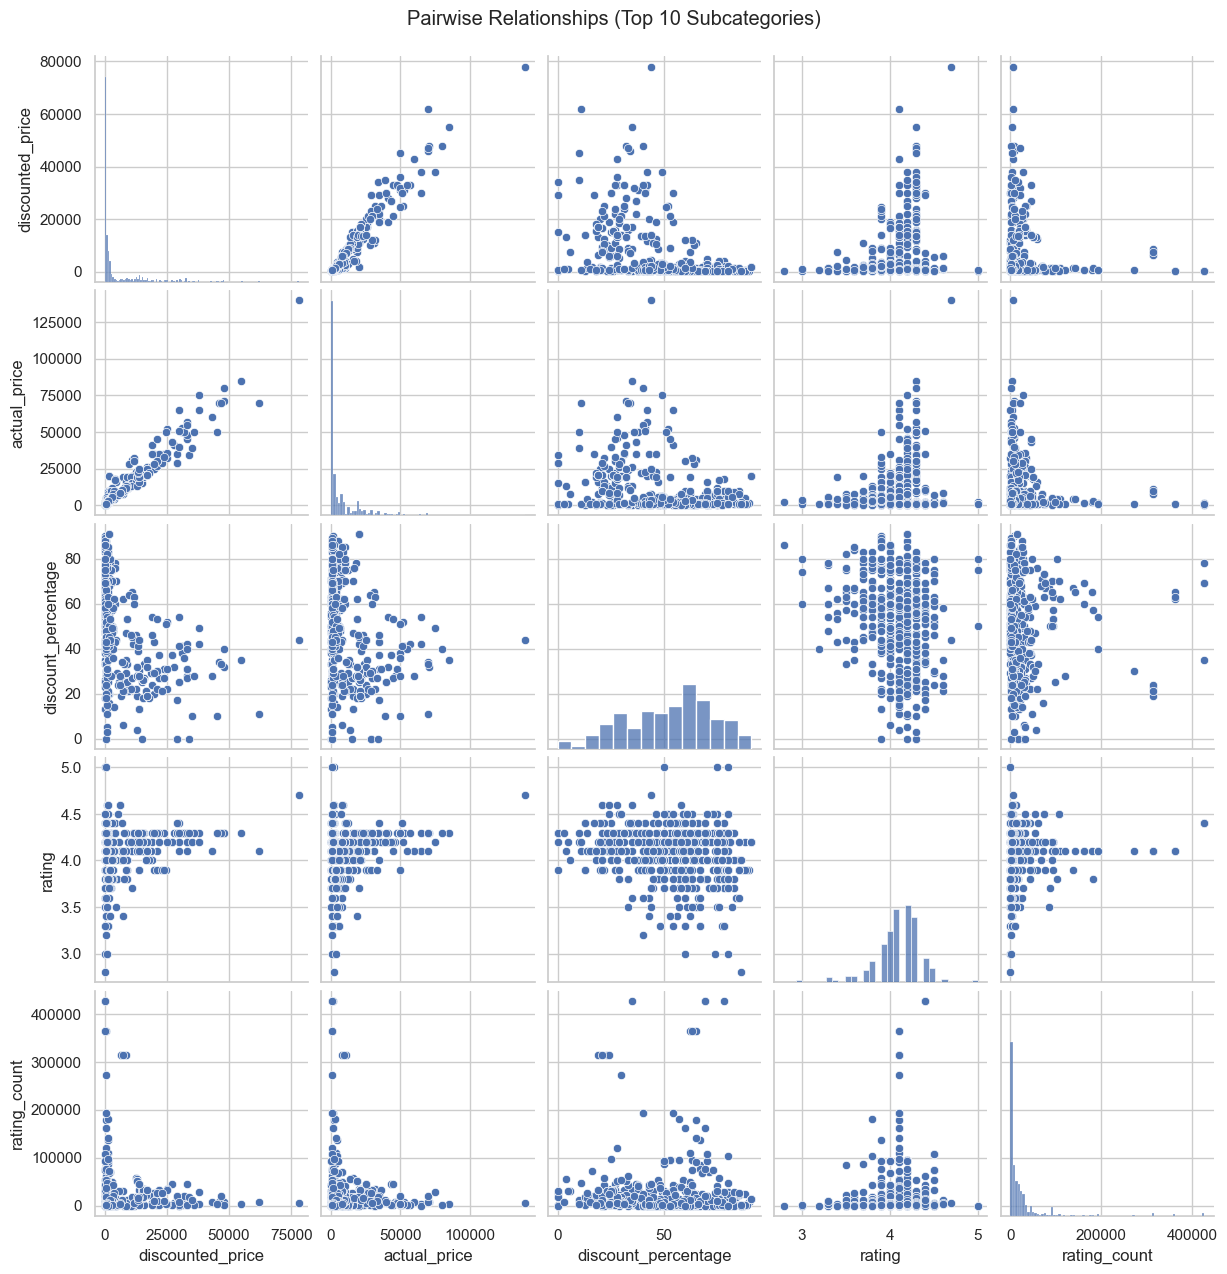

In [22]:
sns.pairplot(df_top10[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']])
plt.suptitle('Pairwise Relationships (Top 10 Subcategories)', y=1.02)
plt.show()